# **Course 3 Automatidata project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

You are the newest data professional in a fictional data analytics firm: Automatidata. The team is still early into the project, having only just completed an initial plan of action and some early Python coding work. 

Luana Rodriquez, the senior data analyst at Automatidata, is pleased with the work you have already completed and requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. 

Additionally, the management team has recently asked all EDA to include Tableau visualizations. For this taxi data, create a Tableau dashboard showing a New York City map of taxi/limo trips by month. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director at the New York City TLC is a person with visual impairments.

# Course 3 End-of-course project: Exploratory data analysis

In this activity, you will examine data provided and prepare it for analysis.  
<br/>   

**The purpose** of this project is to conduct exploratory data analysis on a provided data set.
  
**The goal** is to clean data set and create a visualization.
<br/>  
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results

# **PACE stages** 


* Plan
* Analyse
* Construct
* Execute

## Problem statement

The main task of this project is to conduct an exploratory data analysis (EDA) on the New York City Taxi and Limousine Commission (TLC) dataset. This involves structuring and cleaning the data, and creating visualizations using Python (seaborn) to understand the patterns and trends in taxi ridership.

Specifically, the EDA should include a box plot of ride durations and time series plots, such as a breakdown by quarter or month.

In addition to the EDA, you are also required to create a Tableau dashboard that visualizes taxi/limo trips by month on an NYC map. This dashboard should be easy to understand for non-data savvy individuals and accessible for individuals with visual impairments.

### Task 1. Imports, links, and loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import re

In [2]:
# sns.set()

In [3]:
# Import data
taxi_trips = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

## PACE: Analyze 

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### Task 2a. Data exploration and cleaning

Decide which columns are applicable

Given our scenario, which data columns are most applicable? 
Which data columns can I eliminate, knowing they won’t solve our problem scenario? 

Consider functions that help you understand and structure the data. 

In [4]:
# Prints the first 5 rows of the dataframe
taxi_trips.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [5]:
# Prints the shape of the dataframe
taxi_trips.shape

(22699, 18)

In [6]:
# Prints the data types of the dataframe
taxi_trips.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [7]:
# Method chaining, reads like a recipe. Create two new columns and convert them to datetime objects,
# filter the applicable columns, rename columns which aren't clear

taxi_trips = (taxi_trips
 .assign(pick_up = pd.to_datetime(taxi_trips.tpep_pickup_datetime, format='%m/%d/%Y %I:%M:%S %p'))
 .assign(drop_off = pd.to_datetime(taxi_trips.tpep_dropoff_datetime, format='%m/%d/%Y %I:%M:%S %p'))
 .filter(['trip_duration','trip_distance','pick_up'
          ,'drop_off','fare_amount','extra','tip_amount',
          'total_amount','passenger_count','PULocationID'])
 .rename(columns={'PULocationID': 'pick_up_location'})
              )

In [8]:
taxi_trips.dtypes

trip_distance              float64
pick_up             datetime64[ns]
drop_off            datetime64[ns]
fare_amount                float64
extra                      float64
tip_amount                 float64
total_amount               float64
passenger_count              int64
pick_up_location             int64
dtype: object

In [9]:
# taxi_trips.astype(dtype='')

In [10]:
# Checking which columns contain null values
(taxi_trips
 .isnull()
 .any()
 )

trip_distance       False
pick_up             False
drop_off            False
fare_amount         False
extra               False
tip_amount          False
total_amount        False
passenger_count     False
pick_up_location    False
dtype: bool

In [11]:
# Creating a new variable called trip duration and assigning it to the dataframe
taxi_trips = (taxi_trips
              .assign(trip_duration = (taxi_trips.drop_off-taxi_trips.pick_up))
              )

In [12]:
# Inspecting our new dataframe
taxi_trips.head()

,trip_distance,pick_up,drop_off,fare_amount,extra,tip_amount,total_amount,passenger_count,pick_up_location,trip_duration
0,3.34,2017-03-25 08:55:43,2017-03-25 09:09:47,13.0,0.0,2.76,16.56,6,100,0 days 00:14:04
1,1.80,2017-04-11 14:53:28,2017-04-11 15:19:58,16.0,0.0,4.00,20.80,1,186,0 days 00:26:30
2,1.00,2017-12-15 07:26:56,2017-12-15 07:34:08,6.5,0.0,1.45,8.75,1,262,0 days 00:07:12
3,3.70,2017-05-07 13:17:59,2017-05-07 13:48:14,20.5,0.0,6.39,27.69,1,188,0 days 00:30:15
4,4.37,2017-04-15 23:32:20,2017-04-15 23:49:03,16.5,0.5,0.00,17.80,1,4,0 days 00:16:43


Perform a check for outliers on relevant columns such as trip distance and trip duration. Remember, one of the best ways to look for outliers is a box plot visualization. 

**Note:** Remember to convert your date columns to datetime in order to derive total trip duration.  

In [13]:
from datetime import datetime as dt

In [14]:
# Assigning a new column to the dataframe which returns trip duration as a numeric for analysis
# and then convert to minutes.

taxi_trips = (taxi_trips
              .assign(trip_minutes = (taxi_trips.trip_duration.dt.total_seconds()/60).round(2))
              )

# taxi_trips['trip_duration_minutes'] = taxi_trips['trip_duration'].dt.total_seconds() / 60

In [15]:
# Inspecting the changes took place
taxi_trips.head()

,trip_distance,pick_up,drop_off,fare_amount,extra,tip_amount,total_amount,passenger_count,pick_up_location,trip_duration,trip_minutes
0,3.34,2017-03-25 08:55:43,2017-03-25 09:09:47,13.0,0.0,2.76,16.56,6,100,0 days 00:14:04,14.07
1,1.80,2017-04-11 14:53:28,2017-04-11 15:19:58,16.0,0.0,4.00,20.80,1,186,0 days 00:26:30,26.50
2,1.00,2017-12-15 07:26:56,2017-12-15 07:34:08,6.5,0.0,1.45,8.75,1,262,0 days 00:07:12,7.20
3,3.70,2017-05-07 13:17:59,2017-05-07 13:48:14,20.5,0.0,6.39,27.69,1,188,0 days 00:30:15,30.25
4,4.37,2017-04-15 23:32:20,2017-04-15 23:49:03,16.5,0.5,0.00,17.80,1,4,0 days 00:16:43,16.72


In [16]:
# Inspecting we have our columns as the correct data type
taxi_trips.dtypes

trip_distance               float64
pick_up              datetime64[ns]
drop_off             datetime64[ns]
fare_amount                 float64
extra                       float64
tip_amount                  float64
total_amount                float64
passenger_count               int64
pick_up_location              int64
trip_duration       timedelta64[ns]
trip_minutes                float64
dtype: object

In [17]:
# Statistical analysis of the variables we are interested in

(taxi_trips
 .filter(['trip_distance','trip_minutes'])
 .describe()
)

,trip_distance,trip_minutes
count,22699.000000,22699.000000
mean,2.913313,17.013766
std,3.653171,61.996476
min,0.000000,-16.980000
25%,0.990000,6.650000
50%,1.610000,11.180000
75%,3.060000,18.380000
max,33.960000,1439.550000


<Axes: xlabel='trip_distance'>

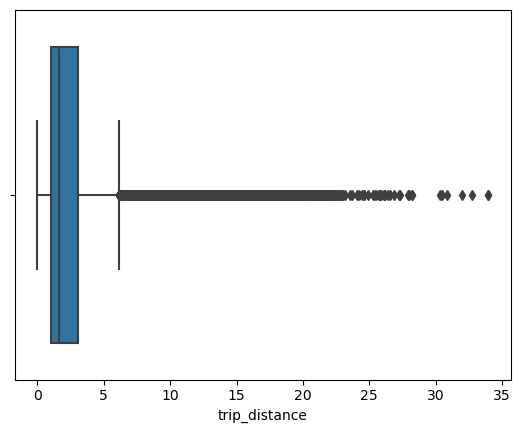

In [18]:
# Boxplot visualising the trip distance outliers

(sns.boxplot(data=taxi_trips
            ,x='trip_distance')
)

In [19]:
# Outlier removal

#calculate interquartile range 
q3, q1 = np.percentile(taxi_trips.trip_distance, [75 ,25])
IQR = q3 - q1

#display interquartile range 
print(IQR.round(2))

# Above Upper bound
upper = q3 + 1.5*IQR

#Below Lower bound
lower = q1 - 1.5*IQR

# Filtering Values between the upper and lower bound. Stack overflows code commented out
# My code uncommented. @ in query method allows us to call variables.

# filtered = df.query('(@Q1 - 1.5 * @IQR) <= nb <= (@Q3 + 1.5 * @IQR)')

trip_distance_filtered = (taxi_trips
                          .query('(@q1 - 1.5*@IQR) <= trip_distance <= (@q3 + 1.5*@IQR) ')
                          )

2.07


<Axes: xlabel='trip_minutes'>

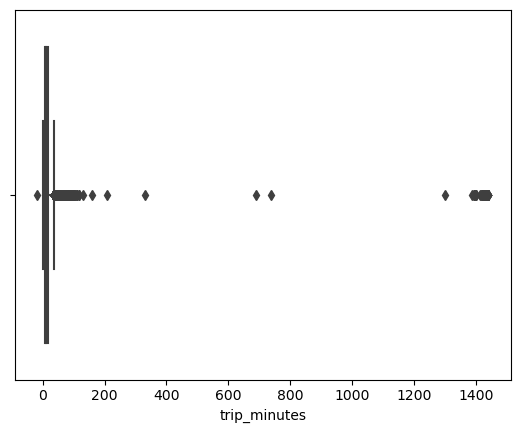

In [20]:
(sns.boxplot(data=taxi_trips
            ,x='trip_minutes')
)

In [21]:
# Exploring the commanality of a taxi trip over 200 minutes.

(taxi_trips
 .query('trip_minutes >= 200')
 .filter(['trip_minutes'])
 .sort_values(by='trip_minutes',ascending=False)
#  .count()
#  .value_counts()
)

,trip_minutes
924,1439.55
15579,1439.15
14998,1438.85
22638,1438.65
15163,1438.55
7939,1438.47
21366,1438.27
6751,1438.03
6493,1437.83
18650,1436.97


In [22]:
# Inspecting the longest trip.

(taxi_trips
 .trip_minutes
# .value_counts()
 .max()
)

1439.55

In [23]:
# Inspecting the frequency of trip durations.
# Shorter journerys appear to be the most common.

(taxi_trips
 .trip_minutes
 .value_counts()
)

7.08     35
9.83     34
7.57     34
6.97     32
10.63    32
         ..
61.30     1
44.35     1
63.12     1
97.45     1
80.75     1
Name: trip_minutes, Length: 3026, dtype: int64

### Task 2b. Assess whether dimensions and measures are correct

### Task 2c. Select visualization type(s)

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TLC dataset. What type of data visualization(s) would be most helpful? 

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


### Task 3. Building visualizations

You’ve assessed your data, and decided on which data variables are most applicable. It’s time to plot your visualization(s)!


In [24]:
# (so.Plot(data= taxi_trips
#         ,x='trip_minutes'
# #         ,x='trip_distance'
#         )
#  .add(so.Bars()
#       ,so.Hist()
# #       ,so.Dodge()
#      )
# )

<Axes: xlabel='trip_distance'>

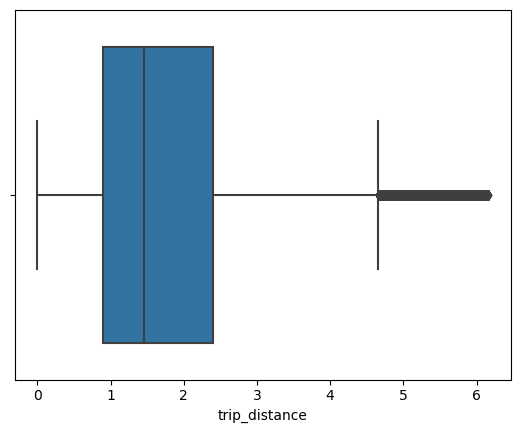

In [25]:
# Plotting the distribution of trip distances with the outliers removed.

(sns.boxplot(data= trip_distance_filtered
             ,x='trip_distance'
             )
 )

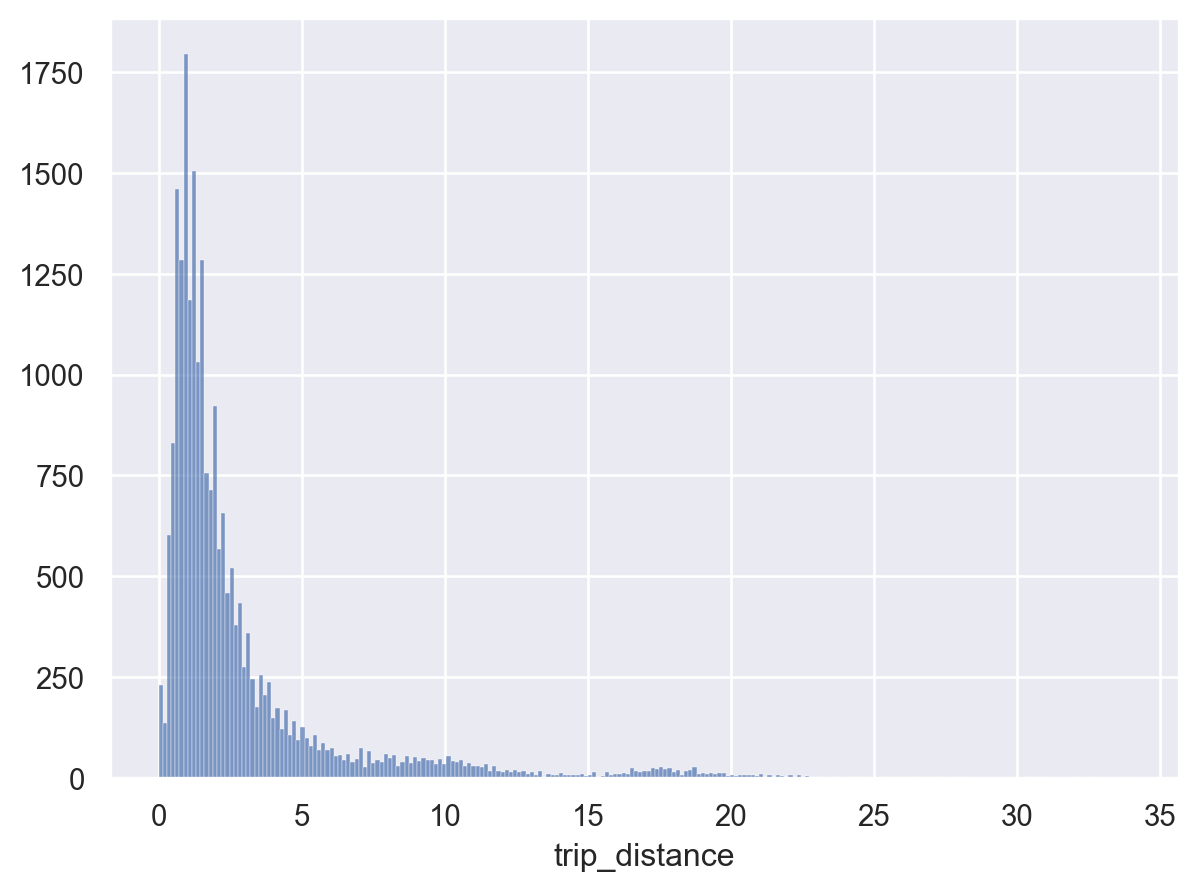

In [26]:
# Plotting the histogram distribution of trip distances.

(so.Plot(data= taxi_trips
         ,x='trip_distance'
         )
 .add(so.Bars(),so.Hist()
#       ,so.Dodge()
     )
)

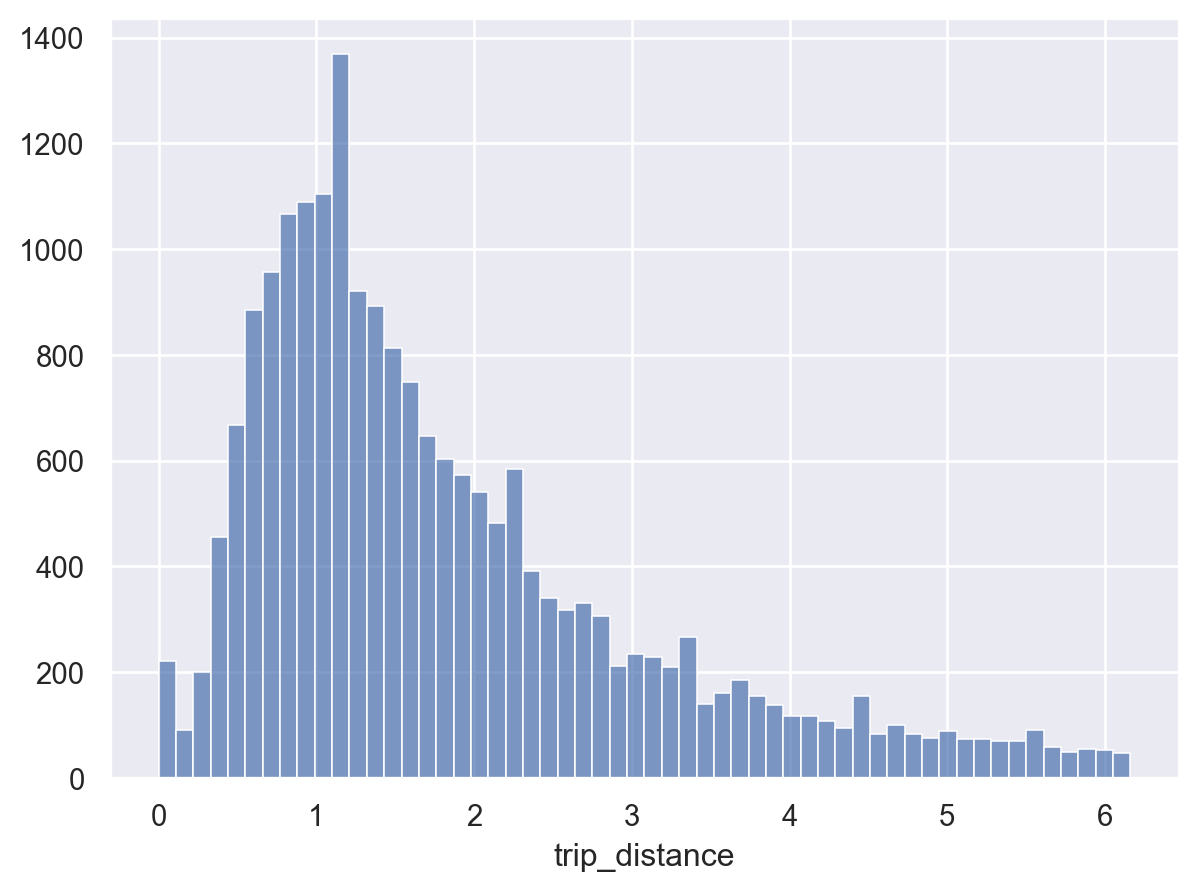

In [27]:
# Plotting the histogram distribution of trip distances with the outliers removed.
# We can see how much more clarity we have in telling stories via outlier removal. 
# Outliers can have validity but as they had low frequency we treated them as anomalies. This allows us to draw better insights.

(so.Plot(data= trip_distance_filtered
         ,x='trip_distance'
         )
 .add(so.Bars(),so.Hist()
#       ,so.Dodge()
     )
)

In [28]:
# Outlier removal for trip minutes

#calculate interquartile range 
q3, q1 = np.percentile(taxi_trips.trip_minutes, [75 ,25])
IQR = q3 - q1

#display interquartile range 
print(IQR.round(2))

# Above Upper bound
upper = q3 + 1.5*IQR

#Below Lower bound
lower = q1 - 1.5*IQR

# Filtering Values between the upper and lower bound. Stack overflows code commented out
# My code uncommented. @ in query method allows us to call variables.

# filtered = df.query('(@Q1 - 1.5 * @IQR) <= nb <= (@Q3 + 1.5 * @IQR)')

trip_minutes_filtered = (taxi_trips
                          .query('(@q1 - 1.5*@IQR) <= trip_minutes <= (@q3 + 1.5*@IQR) ')
                          )

11.73


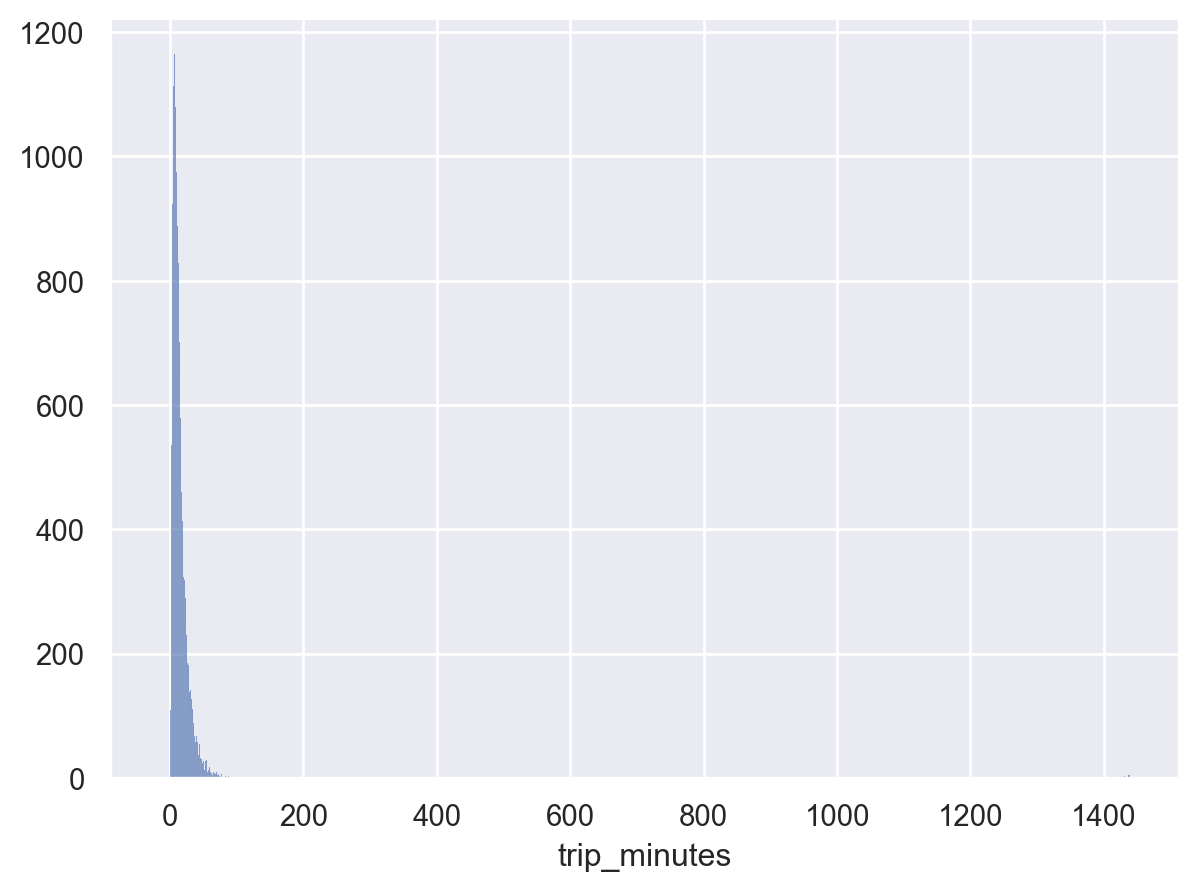

In [29]:
# Plotting the histogram distribution of trip minutes.
# Visually we can see the outliers need to be removed to provide a clearer picture.

(so.Plot(data= taxi_trips
         ,x='trip_minutes'
         )
 .add(so.Bars(),so.Hist()
     )
)

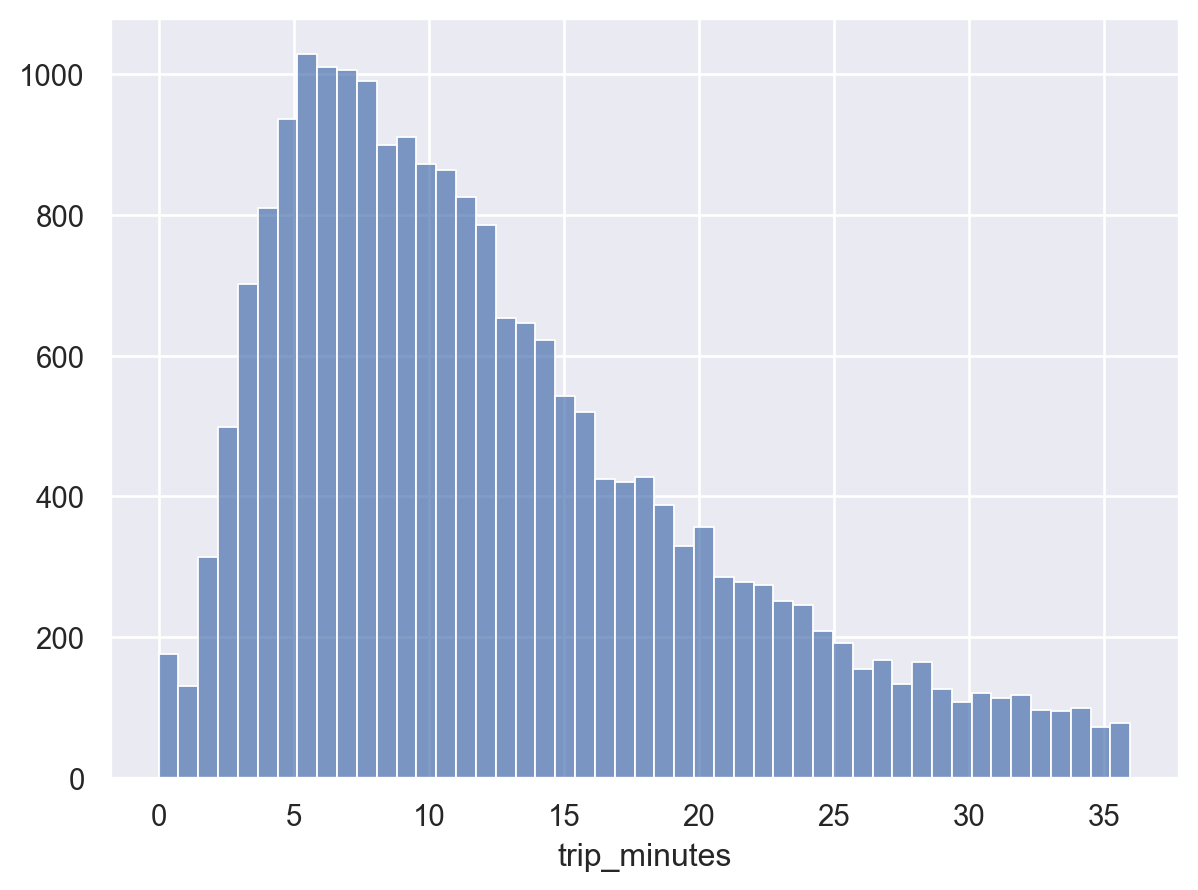

In [30]:
# Plotting the histogram distribution of trip minutes with the outliers removed.
# We can see far clearer which are the actual most common trip durations in minutes. 
# We can now draw insights for the taxi company on the most common trips.

(so.Plot(data= trip_minutes_filtered
         ,x='trip_minutes'
         )
 .add(so.Bars(),so.Hist()
     )
)

<Axes: xlabel='total_amount'>

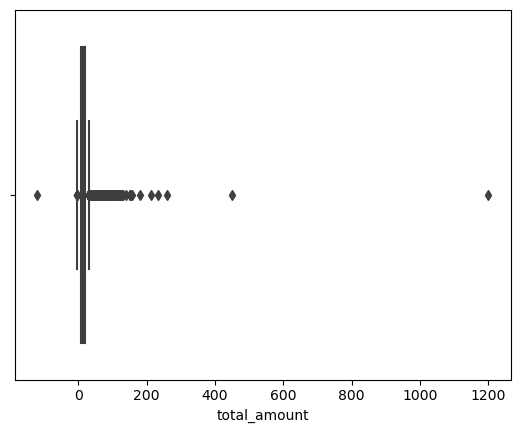

In [31]:
# Visualising total amount paid for taxi trips

(sns.boxplot(data= taxi_trips
             ,x='total_amount'
             )
 )

#### *Remove those trips with costs associated, but with a trip distance = to "0."*

In [32]:
# Check which rows have trip distance = to 0.
#Visualising this inspection, only 148 rows from the large data frame.

(taxi_trips
 .query('trip_distance == 0')
 )

,trip_distance,pick_up,drop_off,fare_amount,extra,tip_amount,total_amount,passenger_count,pick_up_location,trip_duration,trip_minutes
128,0.0,2017-06-22 08:05:33,2017-06-22 08:05:40,20.0,0.0,0.00,20.30,1,231,0 days 00:00:07,0.12
246,0.0,2017-09-18 20:50:53,2017-09-18 20:51:03,2.5,0.5,0.00,3.80,1,145,0 days 00:00:10,0.17
291,0.0,2017-10-04 19:46:24,2017-10-04 19:46:50,2.5,1.0,0.00,4.30,1,132,0 days 00:00:26,0.43
319,0.0,2017-02-22 04:01:44,2017-02-22 04:01:53,2.5,0.5,0.00,3.80,1,90,0 days 00:00:09,0.15
424,0.0,2017-01-14 07:00:26,2017-01-14 07:00:53,2.5,0.0,6.70,10.00,1,208,0 days 00:00:27,0.45
...,...,...,...,...,...,...,...,...,...,...,...
22190,0.0,2017-10-16 08:34:07,2017-10-16 08:34:10,2.5,0.0,0.00,3.30,1,132,0 days 00:00:03,0.05
22325,0.0,2017-07-21 23:30:29,2017-07-21 23:31:12,16.8,0.0,3.42,20.52,1,163,0 days 00:00:43,0.72
22383,0.0,2017-01-07 04:48:42,2017-01-07 04:51:03,10.0,0.0,0.00,10.30,1,55,0 days 00:02:21,2.35
22566,0.0,2017-03-07 02:24:47,2017-03-07 02:24:50,0.0,0.0,0.00,0.00,1,264,0 days 00:00:03,0.05


In [33]:
# Removes those trips with costs associated, but with a trip distance = to 0.
# Neat method to drop these rows.

taxi_trips_2 = (taxi_trips
#  .query('trip_distance == 0')
 .drop(taxi_trips.query('trip_distance == 0').index)
 )

In [34]:
# Another method to drop the rows but this method lacks readability and elegance.
# Unnecessarily complex. Key to keep note of the code we want to produce and what we want to avoid throughout our projects.

# taxi_trips_2 = taxi_trips['trip_distance'].loc[~(taxi_trips==0).all(axis=1)]

In [35]:
# Check if trips = to 0 have been removed.

(taxi_trips_2
 .query('trip_distance == 0')
 )

,trip_distance,pick_up,drop_off,fare_amount,extra,tip_amount,total_amount,passenger_count,pick_up_location,trip_duration,trip_minutes


#### Scatter plot

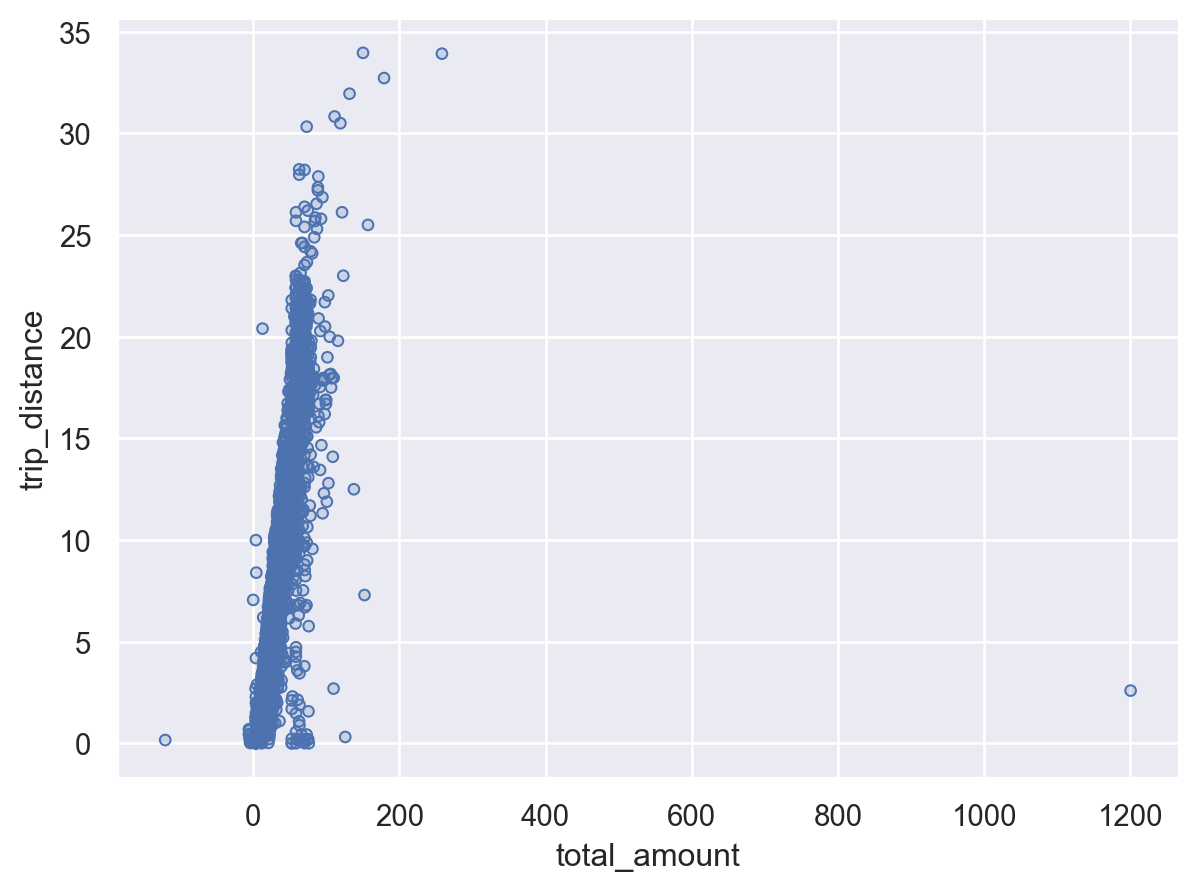

In [36]:
# Visualising a scatter plot gives us a comparison to draw insights from.
# Is there any correlation between trip distance and total amount? There seems to be.

(so.Plot(data=taxi_trips_2
         ,y='trip_distance'
         ,x='total_amount'
         )
 .add(so.Dots()
 ,so.Jitter())
 )

In [37]:
# We can use the corr function to check for a correlation between variables.
# Strong positive correlation between the two variables.

taxi_trips.trip_distance.corr(taxi_trips.total_amount)                     # Pearson's r

0.7671815814347734

In [38]:
# Inspect the unique values of passenger counts.

(taxi_trips
 .passenger_count
 .unique()
 )

array([6, 1, 2, 4, 5, 3, 0], dtype=int64)

In [39]:
# Inspect how many passengers per each unique value.
# It is revealed overwhelmingly in favour of 1 passenger taxi trips.

(taxi_trips
 .passenger_count
 .value_counts()
 )

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

### Sorting tip amount by passenger count.

In [40]:
# Beginner coding style, not very readable

# mean_tips_by_passenger_count = taxi_trips.groupby(['passenger_count']).mean(numeric_only=True)[['tip_amount']]

In [41]:
# Elegant coding style, more readable and sophisticated.

mean_tips_bypassenger_count = (taxi_trips
 .groupby(by='passenger_count')
 .tip_amount
 .agg(func=['mean'])
 )

In [42]:
# Printing the numbers for average tip by passenger count

(mean_tips_bypassenger_count
 .sort_values(by='mean'))

,mean
passenger_count,
4,1.530264
3,1.716768
6,1.720260
1,1.848920
2,1.856378
5,1.873185
0,2.135758


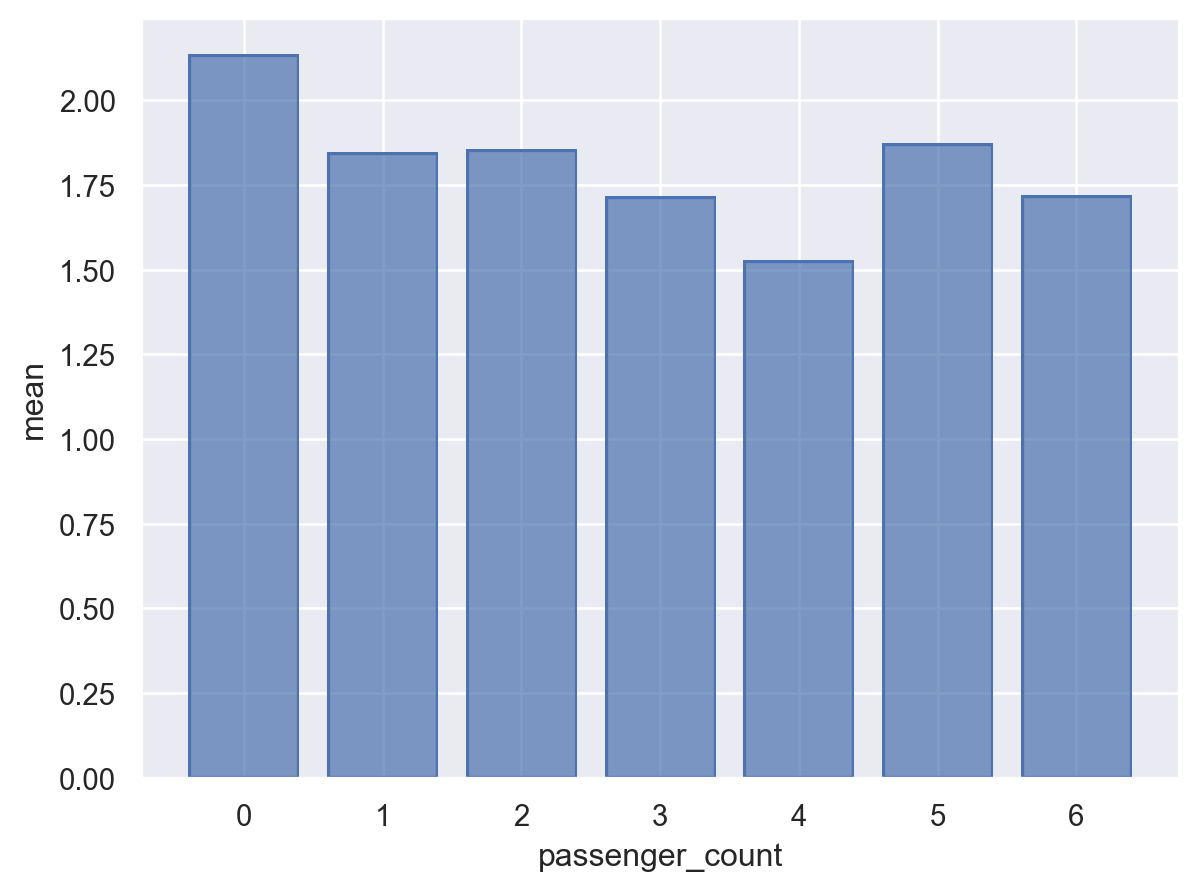

In [43]:
# Visualising this insight. A 0 passenger count is an anaomaly 
# The biggest tips are left by trips with 5 passengers.
# The lowest tips are left by trips with 4 passengers.

(so.Plot(data=mean_tips_bypassenger_count
         ,y='mean'
         ,x='passenger_count'
         )
 .add(so.Bar())
 )

In [44]:
# Sorting fare amount by passenger count.
# A negative tip is surely an anamoly.Unless the driver is paying the passenger for the ride.

(taxi_trips
 .groupby(by='passenger_count')
 .fare_amount
 .agg(func=['mean','min','max'])
 .sort_values(by='mean')
 )

,mean,min,max
passenger_count,,,
1,12.793423,-120.00,999.99
6,12.920635,-2.50,75.50
5,12.931759,-4.00,67.50
3,13.486359,2.50,100.00
4,13.683538,0.01,99.00
2,13.984614,-3.00,450.00
0,14.157576,4.00,77.20


In [45]:
# Sorting which pick up locations pay the highest fare.
# Pick up location 265 have the largest fare prices so drivers may want to work around this area, to maximise wages.
# Pick up location 178 and 208 have very small fare averages. May not be worth working in these areas. Shorter trips possibly.
# We could run a scatter graph visual to check if certain pick up locations tend to book shorter trips.

fare_amount_by_location = (taxi_trips
 .groupby(by='pick_up_location')
 .fare_amount
 .agg(func=['mean','min','max'])
 .sort_values(by='mean')
 )

fare_amount_by_location

,mean,min,max
pick_up_location,,,
178,2.500000,2.5,2.5
208,2.500000,2.5,2.5
168,3.500000,2.5,4.5
14,3.750000,3.0,4.5
242,4.000000,4.0,4.0
...,...,...,...
258,52.000000,52.0,52.0
10,52.000000,52.0,52.0
70,56.890000,6.0,94.2


In [46]:
# Sorting which pick up locations pay the highest tips.
# Pick up location 258 gives the largest tips so drivers may want to work around this area. 216 is also relatively high.
# Multiple pick up locations have mean tips of 0. May not be worth working in these areas if you want to make tips.

tip_amount_by_location = (taxi_trips
 .groupby(by='pick_up_location')
 .tip_amount
 .agg(func=['mean'])
 .sort_values(by='mean', ascending = False)
 )

tip_amount_by_location

,mean
pick_up_location,
258,12.880000
216,11.700000
265,8.599286
130,7.830000
135,6.760000
...,...
69,0.000000
63,0.000000
178,0.000000


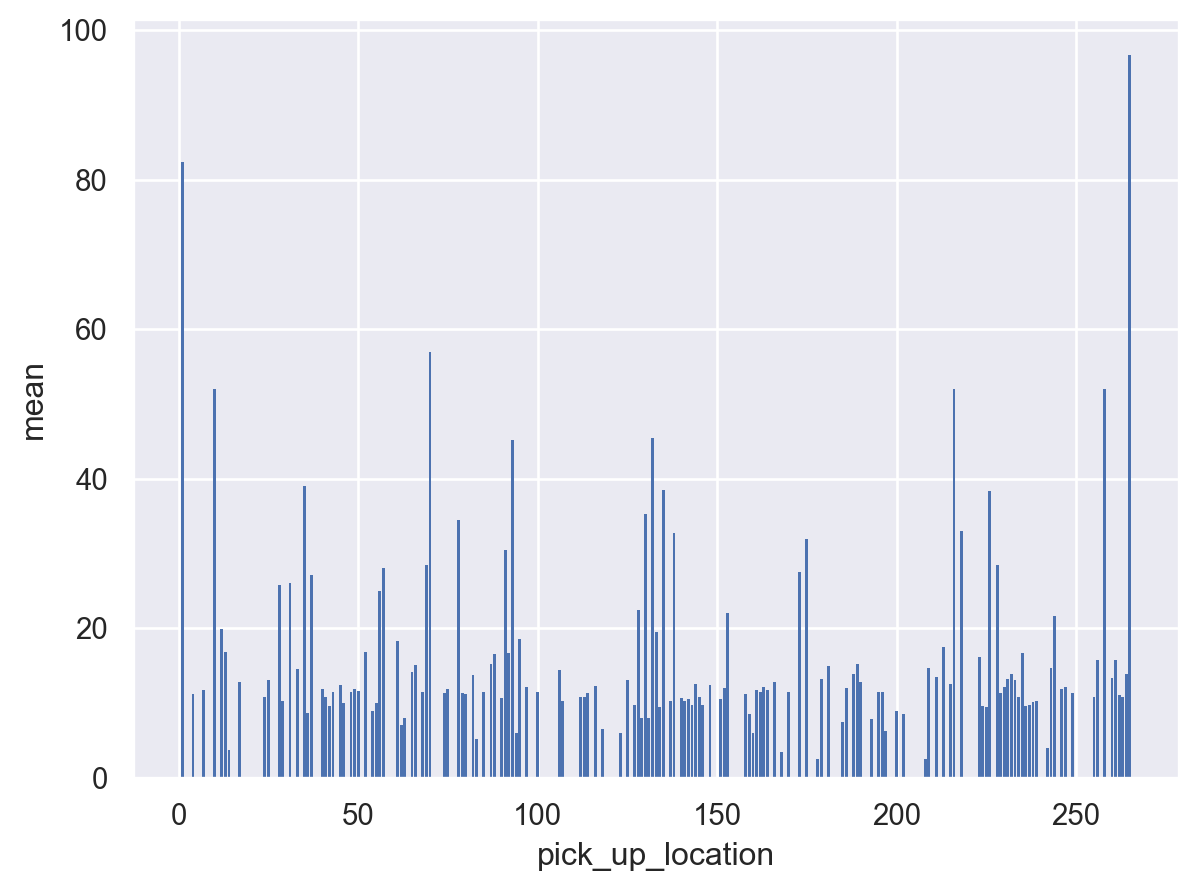

In [47]:
# Visualisation shows the pick up locations in the higher numbers tend to pay greater. Drivers may want to target these areas.

(so.Plot(data=fare_amount_by_location
         ,x='pick_up_location'
         ,y='mean'
         )
 .add(so.Bar())
 )

In [48]:
taxi_trips.fare_amount.corr(taxi_trips.pick_up_location)                     # Pearson's r

-0.051473918147296134

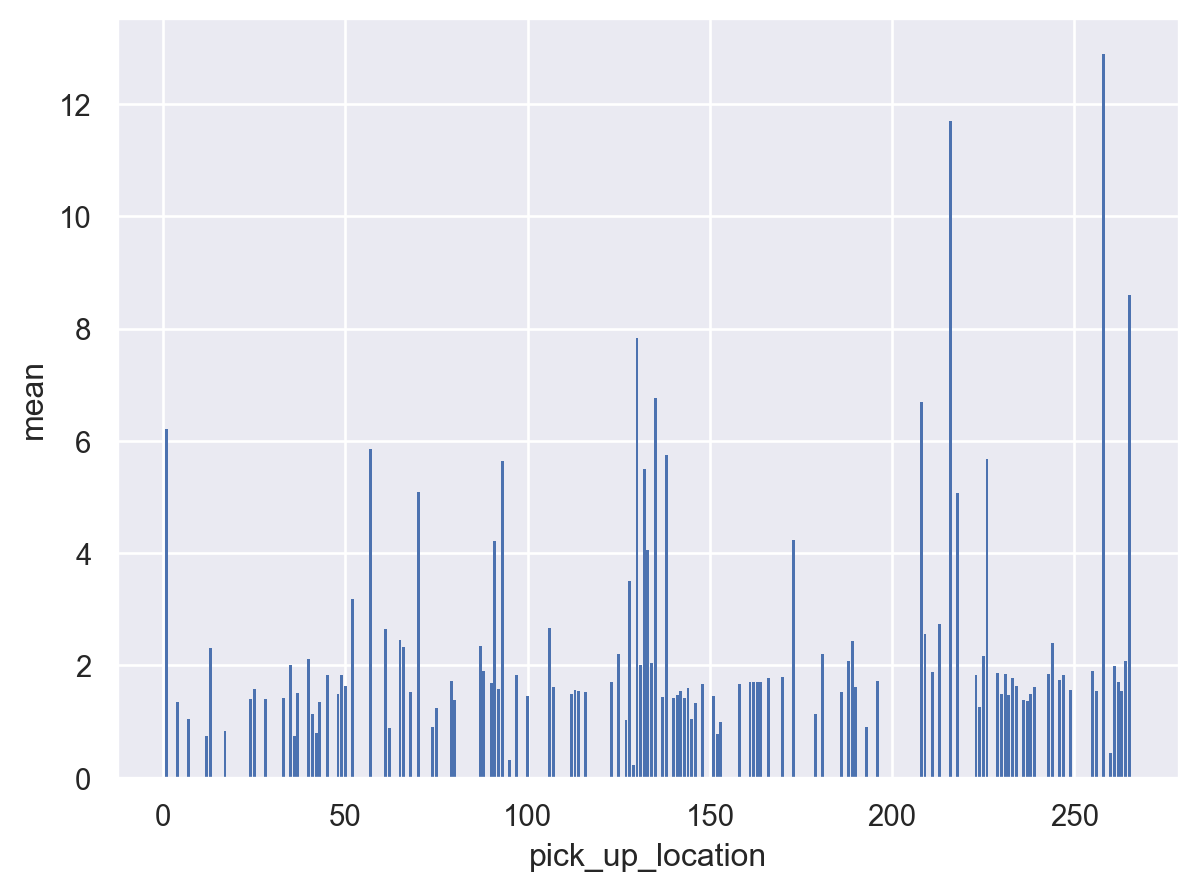

In [49]:
# Visualisation shows the pick up locations in the higher numbers tend to tip greater. Drivers may want to target these areas.

(so.Plot(data=tip_amount_by_location
         ,x='pick_up_location'
         ,y='mean'
         )
 .add(so.Bar())
 )

In [50]:
# taxi_trips.tip_amount.corr(taxi_trips.pick_up_location)                     # Pearson's r

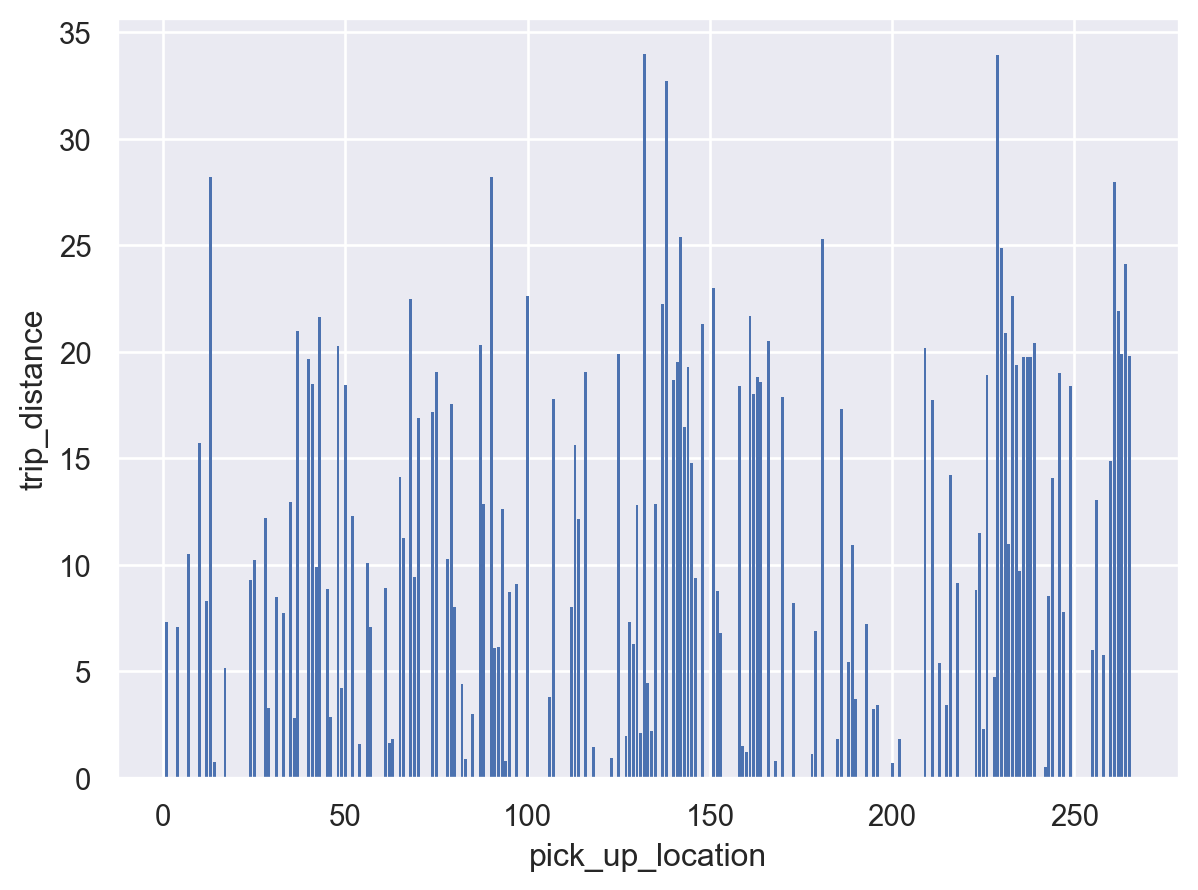

In [51]:
# We decided to the scatter graph visual to check if certain pick up locations tend to book shorter trips.
# Earlier EDA analysis shows this may prove useful.
# The insights aren't clear from the visual but we can check the correlation coefficient.


(so.Plot(data=taxi_trips
         ,y='trip_distance'
         ,x='pick_up_location'
         )
 .add(so.Bar())
 )

In [52]:
# The insights aren't clear from the visual but we can check the correlation coefficient.
# We discover there is no correlation. This shows there is most likely a different reason 
# as to why particular pick up locations provide higher fares and greater tips.
# Further EDA between variables may reveal this insight but we will stop here for now as we have drawn some 
# Great insights for the TLC.

taxi_trips.trip_distance.corr(taxi_trips.pick_up_location)                     # Pearson's r

-0.0807372200896256

## PACE: Execute 

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 4a. Results and evaluation

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue? 

***Pro tip:*** Put yourself in your client's perspective, what would they want to know? 
 

***Ask yourself:*** Did you consider color, contrast, emphasis, and labeling?


I have learned that lower trip distances are far more frequent, lower passenger counts are more common in particular 1 passenger journeys are the most common by far. The vast majority of trip joureys are between 0 and 20 minutes. Passengers rarely pay more than £200 for a taxi trip. The biggest tips are left by trips with 5 passengers.0 Passengers seemed to be an outlier we omitted.
The lowest tips are left by trips with 4 passengers.

Pick up location 265 have the largest fare prices so drivers may want to work around this area, to maximise wages.
Pick up location 178 and 208 have very small fare averages. May not be worth working in these areas. Shorter trips possibly.
We could run a scatter graph visual to check if certain pick up locations tend to book shorter trips.

Pick up location 258 gives the largest tips so drivers may want to work around this area. 216 is also relatively high.
Multiple pick up locations have mean tips of 0. May not be worth working in these areas if you want to make tips.

Visualisation shows the pick up locations in the higher numbers (200s) tend to tip greater. Drivers may want to target these areas.

The insights aren't clear from the visual but we can check the correlation coefficient. We discover there is no correlation. This shows there is most likely a different reason  as to why particular pick up locations provide higher fares and greater tips.

My other questions are and my client would likely want to know. The reason as to why particular pick up locations provide higher fares and greater tips. Trip duration as we discovered during EDA, is not the factor for this as we first hypothesised. Further EDA between variables may reveal this insight to the answer.

To improve my analysis next time, I need to make my visuals more appealing, we done a good job of making the insights and stories clear to see, but we did not consider color, contrast, emphasis and labelling enough. This was more due to time constraints but nevertheless, these are important considerations to present to non technical audiences and stakeholders. 

### Task 4b. Conclusion
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:*
Why is it important to conduct Exploratory Data Analysis? Why would we need to create a visual map of the NYC Taxi rides? Why would this be useful?


EDA is important because it allows us to understand the inherent structure and pattern of a dataset. We can use the insights we draw from a dataset to reveal insights that are unclear or hidden in the data. This allows us data analysts to provide stakeholders and clients with information that allows them to make more informed business decisions.


Visualizations helped me understand that metrics are not always enough. A picture paints a 1000 words and visualisation made some insights clear which I could not see prior to this. They also make insights far more apparent to me and stakeholders. They allow us to curate compelling stories around the data and emphasise any discoveries. 

Visuals are always vitally important for our story telling ability on what we have cleaned. The audience needs to understand with as little complexity as possible. 

You’ve now completed a professional data visualization according to a business need. Well done! Be sure to save your work as a reference for later work in Tableau. 